# California experiment

In [1]:
import numpy as np
import statistics
import hpelm
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_squared_error
from math import sqrt
import sys
sys.path.append('../../')
from src.elm.elms import ClassicELM, ToeplitzELM, CirculantELM, FastFoodELM, ToeplitzLikeELM, VandermondeELM, LowRankELM
import pickle
import matplotlib.pyplot as plt
from tensorflow.keras.initializers import RandomNormal, RandomUniform

# Preprocessing

In [2]:
# Load data
(x, y) =  fetch_california_housing(return_X_y=True, data_home="../datasets")
y = np.expand_dims(y, -1)

In [3]:
# Split data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=8000/20640, random_state=42)

In [4]:
# Init scaler
scaler = StandardScaler(copy=False, with_mean=True, with_std=True)
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

y_train = scaler.fit_transform(y_train)
y = scaler.transform(y)
y_test = scaler.transform(y_test)

delta_y = (max(y) - min(y))[0]

In [5]:
x = None
y = None
scaler = None

# Hyperparameters

## Test different distributions (for Figure 3.4) 
### Execution will take much time!

In [19]:
# Train ELM like Pr. Huang did
print("My classical ELM")
trial_number = 50
n=4
my_training_rmse = np.zeros([n, trial_number])
my_testing_rmse = np.zeros([n, trial_number])

stddev = 1 / (x_train[0].shape[0] ** 0.5)
unifrom = stddev / (12 ** 0.5) / 2
bias = 1 / (12 ** 0.5) / 2
    
for j in range(n):
    print(f"Experiment {j+1}")
    for i in range(trial_number):
        
        if j==0:
            elm = ClassicELM(hidden_neurons=[30], activation="sigmoid", input_shape=x_train[0].shape, use_bias=True,
                     kernel_initializer= RandomNormal(0, stddev), bias_initializer=RandomNormal(0, 1), normalize=True, dev=stddev)
            elm.fit(x_train, y_train, regression_tool="linear_numpy", rcond=1e-6)
        if j==1:
            elm = ClassicELM(hidden_neurons=[30], activation="sigmoid", input_shape=x_train[0].shape, use_bias=True,
                     kernel_initializer= RandomNormal(0, stddev), bias_initializer=RandomUniform(-bias, +bias), normalize=True, dev=stddev)
            elm.fit(x_train, y_train, regression_tool="linear_numpy", rcond=1e-6)
        if j==2:
            elm = ClassicELM(hidden_neurons=[30], activation="sigmoid", input_shape=x_train[0].shape, use_bias=True,
                     kernel_initializer= RandomUniform(-unifrom, unifrom), bias_initializer=RandomNormal(0, 1), normalize=True, dev=stddev)
            elm.fit(x_train, y_train, regression_tool="linear_numpy", rcond=1e-6)
        if j==3:
            elm = ClassicELM(hidden_neurons=[30], activation="sigmoid", input_shape=x_train[0].shape, use_bias=True,
                     kernel_initializer= RandomUniform(-unifrom, unifrom), bias_initializer=RandomUniform(-bias, +bias), normalize=True, dev=stddev)
            elm.fit(x_train, y_train, regression_tool="linear_numpy", rcond=1e-6)

        my_training_rmse[j][i] = elm.calculate_rmse(x_train, y_train, divisor=delta_y)
        my_testing_rmse[j][i] = elm.calculate_rmse(x_test, y_test, divisor=delta_y)
        if (i + 1) % 5 == 0:
            print(f"{i + 1}/{trial_number} Training RMSE: {my_training_rmse[j][i]:.{4}}. Testing RMSE: {my_testing_rmse[j][i]:.{4}}")        

My classical ELM
Experiment 1
5/50 Training RMSE: 0.1385. Testing RMSE: 0.1435
10/50 Training RMSE: 0.1379. Testing RMSE: 0.1423
15/50 Training RMSE: 0.1364. Testing RMSE: 0.1389
20/50 Training RMSE: 0.1401. Testing RMSE: 0.1432
25/50 Training RMSE: 0.1367. Testing RMSE: 0.1404
30/50 Training RMSE: 0.1395. Testing RMSE: 0.1425
35/50 Training RMSE: 0.1393. Testing RMSE: 0.1433
40/50 Training RMSE: 0.1386. Testing RMSE: 0.1425
45/50 Training RMSE: 0.14. Testing RMSE: 0.1433
50/50 Training RMSE: 0.1382. Testing RMSE: 0.1421
Experiment 2
5/50 Training RMSE: 0.1378. Testing RMSE: 0.1417
10/50 Training RMSE: 0.1389. Testing RMSE: 0.1408
15/50 Training RMSE: 0.1379. Testing RMSE: 0.1417
20/50 Training RMSE: 0.1383. Testing RMSE: 0.1412
25/50 Training RMSE: 0.1402. Testing RMSE: 0.1432
30/50 Training RMSE: 0.1383. Testing RMSE: 0.1413
35/50 Training RMSE: 0.1404. Testing RMSE: 0.1435
40/50 Training RMSE: 0.1384. Testing RMSE: 0.1421
45/50 Training RMSE: 0.1387. Testing RMSE: 0.1422
50/50 Train

In [ ]:
axis = ['Norm. Weights \n Norm. Bias', 'Norm. Weights \n Unif. Bias',
       'Unif. Weights \n Norm. Bias', 'Unif. Weights \n Unif. Bias']
result = [axis, my_training_rmse, my_testing_rmse]
with open("california/init_temp.p", "wb") as file:
    pickle.dump(result, file)

## Plot Figure 3.4 (Different distributions)

In [6]:
with open("california/init.p", "rb") as file:
    [axis, my_training_rmse, my_testing_rmse] = pickle.load(file)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


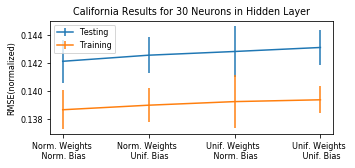

In [7]:
fig = plt.figure(figsize=(10/2.54, 4/2.54))
plt.rcParams.update({'font.size': 8})

means = np.mean(my_testing_rmse, axis=-1)
std = np.std(my_testing_rmse, axis=-1)
plt.errorbar(axis, means, std, label="Testing")

means = np.mean(my_training_rmse, axis=-1)
std = np.std(my_training_rmse, axis=-1)
plt.errorbar(axis, means, std, label="Training")

plt.legend()

plt.xticks(axis)
plt.legend()
plt.title("California Results for 30 Neurons in Hidden Layer")
plt.ylabel("RMSE(normalized)")

plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, 
            hspace = 0, wspace = 0)

plt.savefig("california/cal_types.eps", format="eps", bbox_inches = 'tight',
    pad_inches = 0)

## Results for different s (for deviation equal to s/sqrt(number of inputs))
### Not part of the thesis

In [8]:
with open("california/s.p", "rb") as file:
    [axis, my_training_rmse, my_testing_rmse] = pickle.load(file)

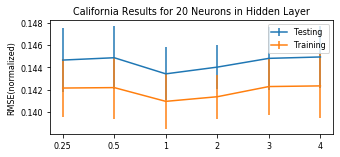

In [9]:
fig = plt.figure(figsize=(10/2.54, 4/2.54))
plt.rcParams.update({'font.size': 8})

means = np.mean(my_testing_rmse, axis=-1)
std = np.std(my_testing_rmse, axis=-1)
plt.errorbar(axis, means, std, label="Testing")

means = np.mean(my_training_rmse, axis=-1)
std = np.std(my_training_rmse, axis=-1)
plt.errorbar(axis, means, std, label="Training")

plt.legend()

plt.xticks(axis)
plt.legend()
plt.title("California Results for 20 Neurons in Hidden Layer")
plt.ylabel("RMSE(normalized)")

plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, 
            hspace = 0, wspace = 0)

# Test method

In [10]:
def test(elm_class, neurons_number=50, trial_number=50, print_every=5,
         regression_tool="linear_numpy", alpha=1e-5, rcond=1e-6, dev=1, **kwargs):
    training_rmse = []
    testing_rmse = []
    stddev = dev / (x_train[0].shape[0] ** 0.5)
    

    for i in range(trial_number):
        elm = elm_class(hidden_neurons=[neurons_number], activation="sigmoid", input_shape=x_train[0].shape,
                        use_bias=True, kernel_initializer=RandomUniform(-1, 1), bias_initializer=RandomNormal(0, 1),
                        dev=stddev, **kwargs)
        elm.fit(x_train, y_train, regression_tool="linear_numpy", rcond=rcond)
        training_rmse.append(elm.calculate_rmse(x_train, y_train) / delta_y)
        testing_rmse.append(elm.calculate_rmse(x_test, y_test) / delta_y)
        if (i + 1) % print_every == 0:
            print(f"{i + 1}/{trial_number} Training RMSE: {training_rmse[i]:.{4}}. Testing RMSE: {testing_rmse[i]:.{4}}")
    return [training_rmse, testing_rmse]

def test_hpelm(neurons_number=50, trial_number=50, print_every=100):
    hpelm_training_rmse = []
    hpelm_testing_rmse = []
    for i in range(trial_number):
        elm = hpelm.ELM(x_train.shape[1], y_train.shape[1])
        elm.add_neurons(neurons_number, "sigm")
        elm.train(x_train, y_train)
        hpelm_training_rmse.append(sqrt(mean_squared_error(elm.predict(x_train), y_train)) / delta_y)
        hpelm_testing_rmse.append(sqrt(mean_squared_error(elm.predict(x_test), y_test)) / delta_y)
        if(i + 1) % print_every == 0:
            print(f"{i + 1}/{trial_number} Training RMSE: {hpelm_training_rmse[i]:.{4}}. Testing RMSE: {hpelm_testing_rmse[i]:.{4}}")
    return [hpelm_training_rmse, hpelm_testing_rmse]       
    


def print_result(name, training_rmse, testing_rmse):
    print(name)
    print(f"Training RMSE: {statistics.mean(training_rmse):.{4}}")
    print(f"Testing RMSE: {statistics.mean(testing_rmse):.{4}}")

# Train the best ELMs
### Execution will take much time!

In [24]:
neurons = []

hpelm_scores = []
classical_scores = []
t_scores = []
c_scores = []
fastfood_scores = []


low_rank = []

In [28]:
for i in range(9, 15):
    n = i * 5
    neurons.append(n)
    
    print(f"Neurons: {n}")
    
    print("LowRank ELM")
    low_rank.append(test(ToeplitzLikeELM, neurons_number=n))
    
    print("My classical ELM")
    classical_scores.append(test(ClassicELM, neurons_number=n))
    
    print("Toeplitz ELM")
    t_scores.append(test(ToeplitzELM, neurons_number=n))

    print("Ciculant ELM")
    c_scores.append(test(CirculantELM, neurons_number=n))
    
    print("Fastfood ELM")
    fastfood_scores.append(test(FastFoodELM, neurons_number=n))
    
    print("Hpelm")
    hpelm_scores.append(test_hpelm(neurons_number=n))


Neurons: 45
LowRank ELM
5/50 Training RMSE: 0.1352. Testing RMSE: 0.1411
10/50 Training RMSE: 0.1342. Testing RMSE: 0.1365
15/50 Training RMSE: 0.1347. Testing RMSE: 0.1395
20/50 Training RMSE: 0.1337. Testing RMSE: 0.1374
25/50 Training RMSE: 0.1343. Testing RMSE: 0.1369
30/50 Training RMSE: 0.1334. Testing RMSE: 0.1368
35/50 Training RMSE: 0.1325. Testing RMSE: 0.1359
40/50 Training RMSE: 0.1333. Testing RMSE: 0.137
45/50 Training RMSE: 0.1324. Testing RMSE: 0.1362
50/50 Training RMSE: 0.1335. Testing RMSE: 0.1361
My classical ELM
5/50 Training RMSE: 0.1344. Testing RMSE: 0.1393
10/50 Training RMSE: 0.1353. Testing RMSE: 0.1377
15/50 Training RMSE: 0.1351. Testing RMSE: 0.1387
20/50 Training RMSE: 0.1329. Testing RMSE: 0.1364
25/50 Training RMSE: 0.1382. Testing RMSE: 0.1434
30/50 Training RMSE: 0.1341. Testing RMSE: 0.1405
35/50 Training RMSE: 0.1366. Testing RMSE: 0.1402
40/50 Training RMSE: 0.1358. Testing RMSE: 0.1404
45/50 Training RMSE: 0.1334. Testing RMSE: 0.1391
50/50 Traini

5/50 Training RMSE: 0.1329. Testing RMSE: 0.1369
10/50 Training RMSE: 0.1318. Testing RMSE: 0.1354
15/50 Training RMSE: 0.1315. Testing RMSE: 0.1336
20/50 Training RMSE: 0.1316. Testing RMSE: 0.1377
25/50 Training RMSE: 0.1315. Testing RMSE: 0.1352
30/50 Training RMSE: 0.1331. Testing RMSE: 0.1377
35/50 Training RMSE: 0.133. Testing RMSE: 0.1376
40/50 Training RMSE: 0.1321. Testing RMSE: 0.1384
45/50 Training RMSE: 0.1303. Testing RMSE: 0.1337
50/50 Training RMSE: 0.132. Testing RMSE: 0.1381
Toeplitz ELM
5/50 Training RMSE: 0.1307. Testing RMSE: 0.1344
10/50 Training RMSE: 0.1324. Testing RMSE: 0.1369
15/50 Training RMSE: 0.1305. Testing RMSE: 0.1344
20/50 Training RMSE: 0.1318. Testing RMSE: 0.1358
25/50 Training RMSE: 0.1311. Testing RMSE: 0.1348
30/50 Training RMSE: 0.1305. Testing RMSE: 0.1361
35/50 Training RMSE: 0.1318. Testing RMSE: 0.1361
40/50 Training RMSE: 0.1316. Testing RMSE: 0.1372
45/50 Training RMSE: 0.1323. Testing RMSE: 0.1375
50/50 Training RMSE: 0.1339. Testing RMSE

KeyboardInterrupt: 

In [13]:
result = [neurons, hpelm_scores, classical_scores, t_scores, c_scores, fastfood_scores, 
          low_rank]
with open("california/results_temp.p", "wb") as file:
     pickle.dump(result, file)

# Train bad ELMs
### Execution will take much time!

In [10]:
vandermonde = test(VandermondeELM, neurons_number=75, transpose=False, drop_ones=False)
vandermonde_do = test(VandermondeELM, neurons_number=75, transpose=False, drop_ones=True)
vandermonde_tr = test(VandermondeELM, neurons_number=75, transpose=True, drop_ones=False)
vandermonde_tr_do = test(VandermondeELM, neurons_number=75, transpose=True, drop_ones=True)
real_low_4 = test(LowRankELM, neurons_number=75, ranks=[4])
real_low_7 = test(LowRankELM, neurons_number=75, ranks=[7])

In [34]:
with open("california/losers_temp.p", "wb") as file:
     pickle.dump([real_low, real_low_7, vandermonde, vandermonde_do, vandermonde_tr, vandermonde_tr_do], file)

# Results (Figure 4.1 and Table 4.1)

In [11]:
with open("california/losers.p", "rb") as file:
     [real_low, real_low_7, vandermonde, vandermonde_do, vandermonde_tr, vandermonde_tr_do] = pickle.load(file)

In [12]:
with open("california/results.p", "rb") as file:
    [neurons, hpelm_scores, classical_scores, t_scores, c_scores, fastfood_scores, 
     low_rank] = pickle.load(file)

## Figure 4.1 and results for Table 4.1

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

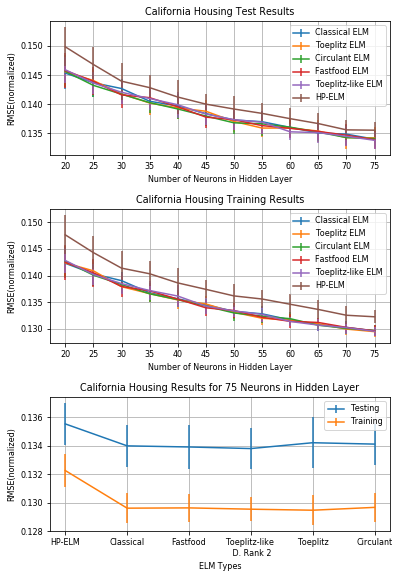

In [13]:
def getAllMeansAndStd(many_scores):
    means = []
    stds = []
    for scores in many_scores:
        (mean, std) = getMeansAndStd(scores)
        means.append(mean)
        stds.append(std)
    return (np.asarray(means), np.asarray(stds))

def getMeansAndStd(scores):
    scores = np.asarray(scores)
    mean = np.mean(scores, axis=-1)
    std = np.std(scores, axis=-1)
    return (mean, std)

start = 0
def plot_scores(scores, neurons, label, start=start, test=True):
    (mean, std) = getMeansAndStd(scores)
    plt.errorbar(neurons[start:], mean[start:, int(test)], std[start:, int(test)], label=label)        

figure = plt.figure(figsize=(12/2.54, 18/2.54))
plt.rcParams.update({'font.size': 8})
plt.subplot(3, 1, 1)

plot_scores(classical_scores, neurons, "Classical ELM")

plot_scores(t_scores, neurons, "Toeplitz ELM")

plot_scores(c_scores, neurons, "Circulant ELM")

plot_scores(fastfood_scores, neurons, "Fastfood ELM")

plot_scores(low_rank, neurons, "Toeplitz-like ELM")

plot_scores(hpelm_scores, neurons, "HP-ELM")
    
plt.title("California Housing Test Results")
plt.xlabel("Number of Neurons in Hidden Layer")
plt.ylabel("RMSE(normalized)")

plt.grid(True)


plt.xticks(neurons)
plt.legend()

plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, 
            hspace = 0.4, wspace = 0)


plt.subplot(3, 1, 2)

plot_scores(classical_scores, neurons, "Classical ELM", test=False)

plot_scores(t_scores, neurons, "Toeplitz ELM", test=False)

plot_scores(c_scores, neurons, "Circulant ELM", test=False)

plot_scores(fastfood_scores, neurons, "Fastfood ELM", test=False)

plot_scores(low_rank, neurons, "Toeplitz-like ELM", test=False)

plot_scores(hpelm_scores, neurons, "HP-ELM", test=False)

plt.title("California Housing Training Results")
plt.xlabel("Number of Neurons in Hidden Layer")
plt.ylabel("RMSE(normalized)")

plt.grid(True)

plt.xticks(neurons)
plt.legend()


table = []

results = [hpelm_scores[-1], classical_scores[-1], fastfood_scores[-1], low_rank[-1], 
           t_scores[-1], c_scores[-1]]
names = ["HP-ELM", "Classical", "Fastfood", "Toeplitz-like \n D. Rank 2",
             "Toeplitz", "Circulant"]
(means, stds) = getAllMeansAndStd(results)

for i in range(len(names)):
    table.append([names[i], means[i], stds[i]])

plt.subplot(3, 1, 3)

plt.errorbar(names, means[:, 1], stds[:, 1], label="Testing")
plt.errorbar(names, means[:, 0], stds[:, 0], label="Training")
plt.title("California Housing Results for 75 Neurons in Hidden Layer")
plt.ylabel("RMSE(normalized)")
plt.xlabel("ELM Types")
plt.grid(True)
plt.legend()

plt.savefig("california/cal_score.eps", format='eps', bbox_inches = 'tight',
    pad_inches = 0)


results = [real_low_7, real_low, vandermonde, 
           vandermonde_do, vandermonde_tr, vandermonde_tr_do]
names = ["Low Rank \n Rank=7", "Low Rank \n Rank=4",  "Vandermonde", 
             "Vandermonde\n WO $1_n$ column", "Vandermonde\n Transposed",
             "Vandermonde\n WO $1_n$ column \n Transposed"]
(means, stds) = getAllMeansAndStd(results)

for i in range(len(names)):
    table.append([names[i], means[i], stds[i]])

## Table 4.1

In [14]:
table

[['HP-ELM', array([0.13226167, 0.13553878]), array([0.00119183, 0.0014533 ])],
 ['Classical',
  array([0.12961686, 0.13399573]),
  array([0.00104084, 0.00145794])],
 ['Fastfood',
  array([0.12963621, 0.13391776]),
  array([0.00099263, 0.00156092])],
 ['Toeplitz-like \n D. Rank 2',
  array([0.1295454, 0.1338063]),
  array([0.00086511, 0.00146721])],
 ['Toeplitz',
  array([0.1294727 , 0.13421637]),
  array([0.00105978, 0.00180276])],
 ['Circulant',
  array([0.12967213, 0.13411913]),
  array([0.00100497, 0.00143589])],
 ['Low Rank \n Rank=7',
  array([0.13693608, 0.14352969]),
  array([0.00685926, 0.00698971])],
 ['Low Rank \n Rank=4',
  array([0.16527864, 0.174832  ]),
  array([0.01602514, 0.01917574])],
 ['Vandermonde',
  array([0.14498008, 0.22067438]),
  array([0.00159456, 0.09325611])],
 ['Vandermonde\n WO $1_n$ column',
  array([0.14797818, 0.16748261]),
  array([0.00153596, 0.02608054])],
 ['Vandermonde\n Transposed',
  array([0.18381293, 0.20500275]),
  array([0.01924815, 0.060515